In [122]:
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from plotter import plot_image, plot_value_array
from keras.models import model_from_json


# load the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# reshaping data to keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [117]:
# load weights into new model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [121]:
# evaluate loaded model on test data
loaded_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
score = loaded_model.evaluate(x_train, y_train)
print(score)

60000/60000 [==============================] - 7s 122us/step
[0.08802869447858272, 0.9944333333333333]


In [119]:
# prediction
pred = loaded_model.predict(x_test)

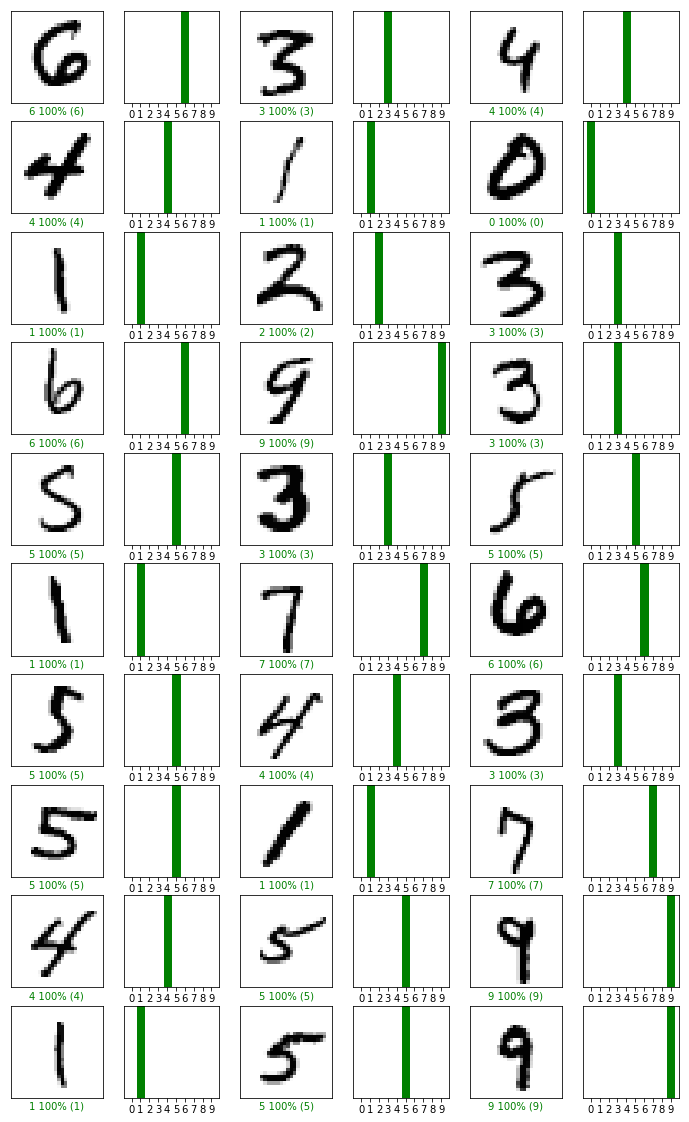

In [123]:
# visualize evaluation result
# create the palate of images with the prediction
# label shown in green if the prediction is correct. Otherwise, it'll be in red
num_rows = 10
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    img_no = random.randint(1,10000)
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(img_no, pred, y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(img_no, pred, y_test)
